<a href="https://colab.research.google.com/github/aphipps923/IMSE541/blob/main/LabA6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Lab6Data2.csv to Lab6Data2.csv
User uploaded file "Lab6Data2.csv" with length 346 bytes


In [2]:
import math
import random
import scipy
import statistics
import numpy as np
import scipy.stats
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import plotly.graph_objects as go
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [76]:
data1 = pd.read_csv('Lab6Data2.csv', sep=',', na_values=".")
data1

,Unnamed: 0,A,B,C,D,Result
0,1,-1,-1,-1,-1,13.413
1,2,1,-1,-1,-1,29.926
2,3,-1,1,-1,-1,23.724
3,4,1,1,-1,-1,35.088
4,5,-1,-1,1,-1,20.554
5,6,1,-1,1,-1,8.466
6,7,-1,1,1,-1,18.613
7,8,1,1,1,-1,26.363
8,9,-1,-1,-1,1,17.512
9,10,1,-1,-1,1,33.919


In [4]:
df=data1 #df means data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  16 non-null     int64  
 1   A           16 non-null     int64  
 2   B           16 non-null     int64  
 3   C           16 non-null     int64  
 4   D           16 non-null     int64  
 5   Result      16 non-null     float64
dtypes: float64(1), int64(5)
memory usage: 896.0 bytes


In [5]:
Xmain=df[['A', 'B', 'C', 'D']]
Xmain

,A,B,C,D
0,-1,-1,-1,-1
1,1,-1,-1,-1
2,-1,1,-1,-1
3,1,1,-1,-1
4,-1,-1,1,-1
5,1,-1,1,-1
6,-1,1,1,-1
7,1,1,1,-1
8,-1,-1,-1,1
9,1,-1,-1,1


In [6]:
x1x2x3x4=df['A'] * df['B'] *df['C'] * df['D']
x1x2x3x4

0     1
1    -1
2    -1
3     1
4    -1
5     1
6     1
7    -1
8    -1
9     1
10    1
11   -1
12    1
13   -1
14   -1
15    1
dtype: int64

In [7]:
xx=Xmain.to_numpy()
poly= PolynomialFeatures(degree=3, interaction_only=True)
xxpd=pd.DataFrame(poly.fit_transform(xx), columns=['I', 'x1', 'x2', 'x3', 'x4','x1x2', 'x1x3', 'x1x4', 'x2x3', 'x2x4', 'x3x4', 'x1x2x3', 'x1x2x4', 'x1x3x4','x2x3x4'])
xxpd['x1x2x3x4']=x1x2x3x4
xxpd

,I,x1,x2,x3,x4,x1x2,x1x3,x1x4,x2x3,x2x4,x3x4,x1x2x3,x1x2x4,x1x3x4,x2x3x4,x1x2x3x4
0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1
1,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1
2,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1
3,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1
4,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1
5,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1
6,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,1
7,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1
8,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1
9,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1


In [88]:
X=xxpd[['x1','x2','x3','x4','x1x2', 'x1x3', 'x1x4', 'x2x3', 'x2x4', 'x3x4']]
Y=df[['Result']]
regr=LinearRegression()
regr.fit(X,Y)
Yhat=regr.predict(X)
Y=Y.to_numpy()
eij=Y-Yhat
print(eij)

[[-3.276125]
 [ 3.204875]
 [ 3.237875]
 [-3.166625]
 [ 3.080125]
 [-3.008875]
 [-3.041875]
 [ 2.970625]
 [-2.998875]
 [ 3.070125]
 [ 3.037125]
 [-3.108375]
 [ 3.194875]
 [-3.266125]
 [-3.233125]
 [ 3.304375]]


In [89]:
X=xxpd[['I','x1','x2','x3','x4','x1x2', 'x1x3', 'x1x4', 'x2x3', 'x2x4', 'x3x4']]
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     3.121
Date:                Fri, 14 Oct 2022   Prob (F-statistic):              0.110
Time:                        03:00:53   Log-Likelihood:                -41.007
No. Observations:                  16   AIC:                             104.0
Df Residuals:                       5   BIC:                             112.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I             23.9761      1.404     17.078      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=16



In [10]:
#Terms x2, x3, x1x3

In [11]:
# Reduced model with only factors B, C, and AC
X=xxpd[['x2','x3','x1x3']]
Y=df[['Result']]
regr2=LinearRegression()
regr2.fit(X,Y)
Yhat2=regr2.predict(X)
X2=xxpd[['I','x2','x3','x1x3']]
model2 = sm.OLS(Y, X2)
res2=model2.fit()
print(res2.summary())


                            OLS Regression Results                            
Dep. Variable:                 Result   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     6.746
Date:                Fri, 14 Oct 2022   Prob (F-statistic):            0.00643
Time:                        00:14:20   Log-Likelihood:                -48.940
No. Observations:                  16   AIC:                             105.9
Df Residuals:                      12   BIC:                             109.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I             23.9761      1.488     16.114      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


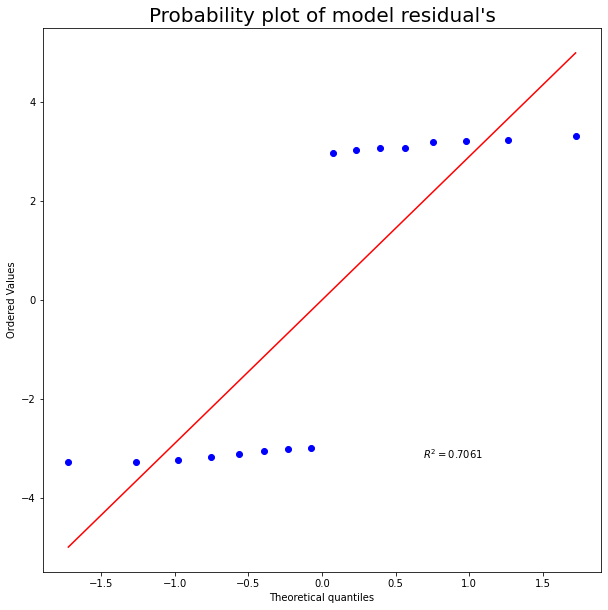

In [12]:
#Model 1

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

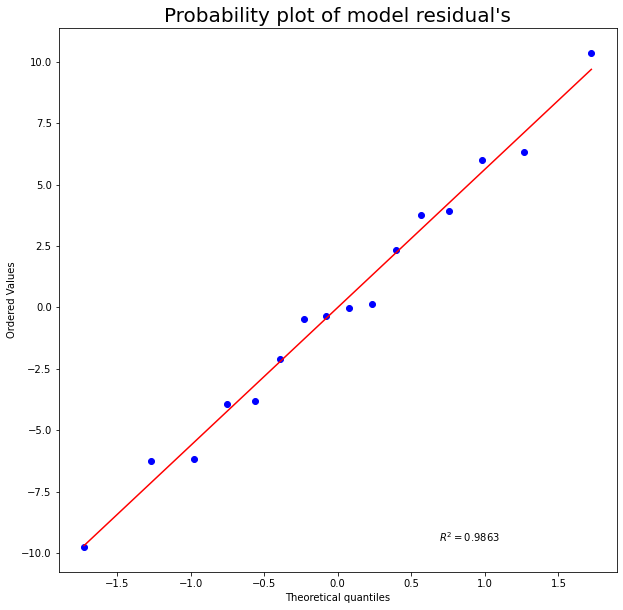

In [13]:
#Model 2

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res2.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

In [17]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(

x=[["x2","x2",None,"x3","x3"],[1,2,None,2,3]],

y=[10, 20, None, 15, 10],

connectgaps=False
))

fig.show()

In [20]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(

x=[["x3","x3",None,"x1x3","x1x3"],[1,2,None,2,3]],

y=[10, 20, None, 15, 10],

connectgaps=False
))

fig.show()

In [22]:
# Homogeneity of Variance check for Factor A
# if the p value is small, reject H0 that the residuals have equal variance
# if the p value is large, cannot reject H0

stats.levene(df['Result'][df['B'] == -1],
             df['Result'][df['B'] == 1])

LeveneResult(statistic=0.7322520436977437, pvalue=0.4065617328262192)

In [25]:
stats.levene(df['Result'][df['C'] == -1],
             df['Result'][df['C'] == 1])

LeveneResult(statistic=0.4281907914825862, pvalue=0.5234830201726113)

In [46]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Lab6Data2C_2.csv to Lab6Data2C_2.csv
User uploaded file "Lab6Data2C_2.csv" with length 161 bytes


In [47]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Lab6Data2C+2.csv to Lab6Data2C+2.csv
User uploaded file "Lab6Data2C+2.csv" with length 161 bytes


In [48]:
data2 = pd.read_csv('Lab6Data2C_2.csv', sep=',', na_values=".")
data2

,Unnamed: 0,A,B,D,Result
0,1,-1,-1,-1,13.413
1,2,1,-1,-1,29.926
2,3,-1,1,-1,23.724
3,4,1,1,-1,35.088
4,9,-1,-1,1,17.512
5,10,1,-1,1,33.919
6,11,-1,1,1,27.534
7,12,1,1,1,39.463


In [49]:
data3 = pd.read_csv('Lab6Data2C+2.csv', sep=',', na_values=".")
data3

,Unnamed: 0,A,B,D,Result
0,5,-1,-1,-1,20.554
1,6,1,-1,-1,8.466
2,7,-1,1,-1,18.613
3,8,1,1,-1,26.363
4,13,-1,-1,1,24.183
5,14,1,-1,1,12.029
6,15,-1,1,1,22.125
7,16,1,1,1,30.706


In [58]:
Xmain2=data2[['A', 'B', 'D']]
Xmain2

,A,B,D
0,-1,-1,-1
1,1,-1,-1
2,-1,1,-1
3,1,1,-1
4,-1,-1,1
5,1,-1,1
6,-1,1,1
7,1,1,1


In [66]:
xx2=Xmain2.to_numpy()
poly= PolynomialFeatures(degree=1, interaction_only=False)
xx2pd=pd.DataFrame(poly.fit_transform(xx2), columns=['I','x1', 'x2', 'x4'])
xx2pd

,I,x1,x2,x4
0,1.0,-1.0,-1.0,-1.0
1,1.0,1.0,-1.0,-1.0
2,1.0,-1.0,1.0,-1.0
3,1.0,1.0,1.0,-1.0
4,1.0,-1.0,-1.0,1.0
5,1.0,1.0,-1.0,1.0
6,1.0,-1.0,1.0,1.0
7,1.0,1.0,1.0,1.0


In [86]:
X22=xx2pd[['I','x1','x2','x4']]
Y2=data2[['Result']]
regr2=LinearRegression()
regr2.fit(X22,Y2)
Yhat2=regr2.predict(X22)
Y2=Y2.to_numpy()
eij2=Y2-Yhat2
print(eij2)

[[-1.21825]
 [ 1.2415 ]
 [ 1.333  ]
 [-1.35625]
 [-1.1885 ]
 [ 1.16525]
 [ 1.07375]
 [-1.0505 ]]


In [97]:
model2 = sm.OLS(Y2, X22)
res2=model2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     62.68
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           0.000808
Time:                        03:04:38   Log-Likelihood:                -12.861
No. Observations:                   8   AIC:                             33.72
Df Residuals:                       4   BIC:                             34.04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I             27.5724      0.604     45.660      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=8



In [71]:
Xmain3=data3[['A', 'B', 'D']]
Xmain3

,A,B,D
0,-1,-1,-1
1,1,-1,-1
2,-1,1,-1
3,1,1,-1
4,-1,-1,1
5,1,-1,1
6,-1,1,1
7,1,1,1


In [72]:
xx3=Xmain3.to_numpy()
poly= PolynomialFeatures(degree=1, interaction_only=False)
xx3pd=pd.DataFrame(poly.fit_transform(xx3), columns=['I','x1', 'x2', 'x4'])
xx3pd

,I,x1,x2,x4
0,1.0,-1.0,-1.0,-1.0
1,1.0,1.0,-1.0,-1.0
2,1.0,-1.0,1.0,-1.0
3,1.0,1.0,1.0,-1.0
4,1.0,-1.0,-1.0,1.0
5,1.0,1.0,-1.0,1.0
6,1.0,-1.0,1.0,1.0
7,1.0,1.0,1.0,1.0


In [93]:
X3=xx3pd[['I','x1','x2','x4']]
Y3=data3[['Result']]
regr3=LinearRegression()
regr3.fit(X3,Y3)
Yhat3=regr3.predict(X3)
Y3=Y3.to_numpy()
eij3=Y3-Yhat3
print(eij3)

[[ 5.138  ]
 [-4.97225]
 [-4.94675]
 [ 4.781  ]
 [ 5.00525]
 [-5.171  ]
 [-5.1965 ]
 [ 5.36225]]


In [98]:
model3 = sm.OLS(Y3, X3)
res3=model3.fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     1.092
Date:                Fri, 14 Oct 2022   Prob (F-statistic):              0.449
Time:                        03:05:02   Log-Likelihood:                -24.345
No. Observations:                   8   AIC:                             56.69
Df Residuals:                       4   BIC:                             57.01
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I             20.3799      2.537      8.032      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=8



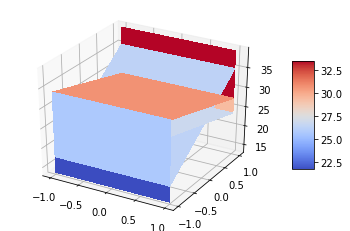

In [77]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=data2['A']
x2=data2['B']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Y2, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

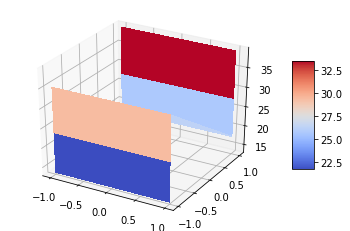

In [101]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=data2['A']
x4=data2['D']
x1, x4 = np.meshgrid(x1, x4)

# Plot the surface.
surf = ax.plot_surface(x1, x4, Y2, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

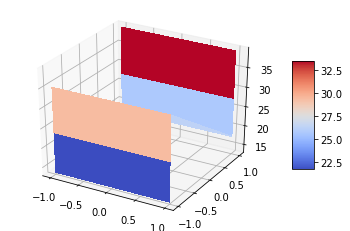

In [102]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x2=data2['B']
x4=data2['D']
x2, x4 = np.meshgrid(x2, x4)

# Plot the surface.
surf = ax.plot_surface(x2, x4, Y2, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

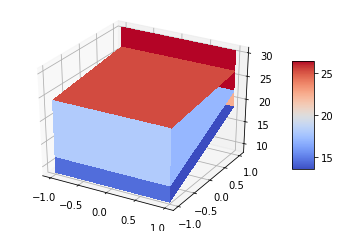

In [103]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=data2['A']
x2=data2['B']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Y3, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

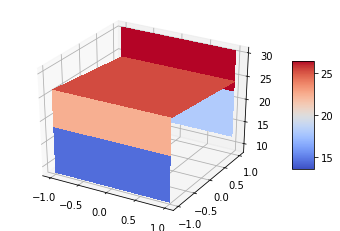

In [104]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=data2['A']
x4=data2['D']
x1, x4 = np.meshgrid(x1, x4)

# Plot the surface.
surf = ax.plot_surface(x1, x4, Y3, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

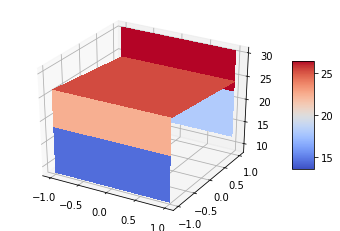

In [105]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x2=data2['B']
x4=data2['D']
x2, x4 = np.meshgrid(x2, x4)

# Plot the surface.
surf = ax.plot_surface(x2, x4, Y3, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()